Multi-variable logistic regression gradient descent algorithm for 
https://www.coursera.org/learn/machine-learning/home/week/3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy.linalg import inv

%matplotlib inline


In [2]:
class LogisticRegressor():
    
    def __init__(self, X, y, theta):
        self._X     = X
        self._y     = y
        self._m     = X.shape[0]
        self._theta = theta
    
    def computeCost(self):
        # hypothesis is
        #   h0(x) = 1 / (1 + exp(-(theta(0) * x(0) + theta(1) * x(1) + ... + theta(n) * x(n))))
        # where x(0) = 1
        # 
        # or more concisely
        #   h0(x) = 1 / (1 + e^(-theta.T * x))
        #
        inner = np.dot(self._X, self._theta)
        
        # This is the sigmoid function giving us values between 0 and 1
        h_theta_x = 1 / (1 + np.exp(-inner))
        
        # Finally here is our cost function using those values between 0 and 1
        sum = np.sum(self._y * np.log(h_theta_x) + ((1 - self._y) * np.log(1 - h_theta_x)))
        return -(sum / self._m)
    # end of computeCost
    
    def predict(self, xin):
        # column 0 should be Ones
        assert (xin[0] == 1)
        
        # use the sigmoid function to give us values between 0 and 1
        # which is effectively a percentage chance
        inner = np.dot(xin, self._theta)
        return (1 / (1 + np.exp(-inner)))
    
-


In [4]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target

# turn it into a column vector
y = np.reshape(y, (len(y), 1))

print("X shape=", X.shape, "features=", iris.feature_names)
print("targets=", iris.target_names)
print("y shape=", y.shape)
#print("X[:5]=", X[:5])

yversus = [] 

# produce new copies of target arrays for each unique
# value in the target namespace.  Each of these
# new arrays will have their y values changed to be
# either (1) or (0).  If y is set to 1 then this
# sample represents a positive example of features for 
# the specific target name.   
#
# E.G. target_names = [ 'zero', 'one', 'two' ]
#      targets      = [ 0, 0, 0, 2, 2, 2, 2, 1, 1]
#      ydict['one'] = [ 0, 0, 0, 0, 0, 0, 0, 1, 1]
#     ydict['zero'] = [ 1, 1, 1, 0, 0, 0, 0, 0, 0]
#      ydict['two'] = [ 0, 0, 0, 1, 1, 1, 1, 0, 0]
#
# What we're producing here is multiple sets of target values so
# that we can run multiple iterations of logistic regression
# building hypothesis (unique theta values) for each unique target
# name.   Basically this is the "one versus the rest" approach
# for logistic regression
# 
for i in range(len(iris.target_names)):
    mask = np.copy(y)
    mask[:][y == i] = 1
    mask[:][y != i] = 0
    yversus.append(mask)

# At column 0 insert a Ones column
XOnes = np.insert(X, 0, 1, axis=1)
#print("XOnes[:5]=", XOnes[:5])


X shape= (150, 4) features= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets= ['setosa' 'versicolor' 'virginica']
y shape= (150, 1)


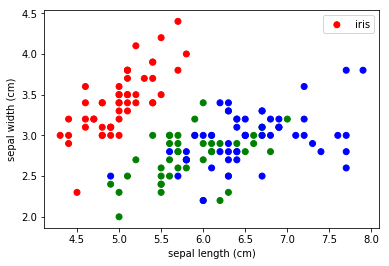

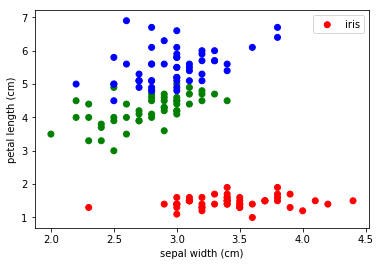

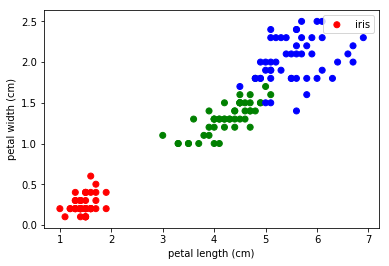

In [5]:
# Lets take a look at the clustering depending on the
# different features
#
pltColors = [ ( 'r', 'g', 'b', 'c', 'm', 'k' )[i] for i in y.ravel() ]
for xindex, yindex in zip(range(X.shape[1]), range(1, X.shape[1])):

    plt.scatter(X[:,xindex], X[:,yindex], color=pltColors, marker='o', label='iris')

    plt.xlabel(iris.feature_names[xindex])
    plt.ylabel(iris.feature_names[yindex])

    plt.legend(loc='upper right')
    plt.show()                  


X= [[ 1.   5.1  3.5  1.4  0.2]
 [ 1.   4.9  3.   1.4  0.2]
 [ 1.   4.7  3.2  1.3  0.2]
 [ 1.   4.6  3.1  1.5  0.2]
 [ 1.   5.   3.6  1.4  0.2]
 [ 1.   5.4  3.9  1.7  0.4]
 [ 1.   4.6  3.4  1.4  0.3]
 [ 1.   5.   3.4  1.5  0.2]
 [ 1.   4.4  2.9  1.4  0.2]
 [ 1.   4.9  3.1  1.5  0.1]]
theta= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
X dot theta= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
y= [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
error= [[-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]]
X= [[ 1.   5.1  3.5  1.4  0.2]
 [ 1.   4.9  3.   1.4  0.2]
 [ 1.   4.7  3.2  1.3  0.2]
 [ 1.   4.6  3.1  1.5  0.2]
 [ 1.   5.   3.6  1.4  0.2]
 [ 1.   5.4  3.9  1.7  0.4]
 [ 1.   4.6  3.4  1.4  0.3]
 [ 1.   5.   3.4  1.5  0.2]
 [ 1.   4.4  2.9  1.4  0.2]
 [ 1.   4.9  3.1  1.5  0.1]]
theta= [[-0.025  ]
 [-0.18795]
 [-0.05815]
 [-0.2087 ]
 [-0.0777 ]]
X dot theta= [[-1.49479 ]
 [-1.428125]
 [-1.381295]
 [-1.398425]
 [-1.48181 ]
 [-1.652585]
 [-1

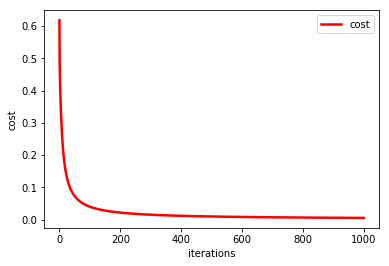

X= [[ 1.   5.1  3.5  1.4  0.2]
 [ 1.   4.9  3.   1.4  0.2]
 [ 1.   4.7  3.2  1.3  0.2]
 [ 1.   4.6  3.1  1.5  0.2]
 [ 1.   5.   3.6  1.4  0.2]
 [ 1.   5.4  3.9  1.7  0.4]
 [ 1.   4.6  3.4  1.4  0.3]
 [ 1.   5.   3.4  1.5  0.2]
 [ 1.   4.4  2.9  1.4  0.2]
 [ 1.   4.9  3.1  1.5  0.1]]
theta= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
X dot theta= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
y= [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
error= [[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
X= [[ 1.   5.1  3.5  1.4  0.2]
 [ 1.   4.9  3.   1.4  0.2]
 [ 1.   4.7  3.2  1.3  0.2]
 [ 1.   4.6  3.1  1.5  0.2]
 [ 1.   5.   3.6  1.4  0.2]
 [ 1.   5.4  3.9  1.7  0.4]
 [ 1.   4.6  3.4  1.4  0.3]
 [ 1.   5.   3.4  1.5  0.2]
 [ 1.   4.4  2.9  1.4  0.2]
 [ 1.   4.9  3.1  1.5  0.1]]
theta= [[-0.025  ]
 [-0.14145]
 [-0.09055]
 [-0.0689 ]
 [-0.0236 ]]
X dot theta= [[-1.1645  ]
 [-1.090935]
 [-1.073865]
 [-1.064445]
 [-1.15941 ]
 [-1.268545]
 [-1

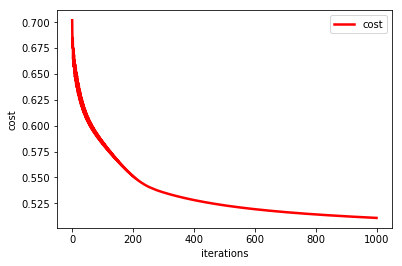

X= [[ 1.   5.1  3.5  1.4  0.2]
 [ 1.   4.9  3.   1.4  0.2]
 [ 1.   4.7  3.2  1.3  0.2]
 [ 1.   4.6  3.1  1.5  0.2]
 [ 1.   5.   3.6  1.4  0.2]
 [ 1.   5.4  3.9  1.7  0.4]
 [ 1.   4.6  3.4  1.4  0.3]
 [ 1.   5.   3.4  1.5  0.2]
 [ 1.   4.4  2.9  1.4  0.2]
 [ 1.   4.9  3.1  1.5  0.1]]
theta= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
X dot theta= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
y= [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
error= [[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
X= [[ 1.   5.1  3.5  1.4  0.2]
 [ 1.   4.9  3.   1.4  0.2]
 [ 1.   4.7  3.2  1.3  0.2]
 [ 1.   4.6  3.1  1.5  0.2]
 [ 1.   5.   3.6  1.4  0.2]
 [ 1.   5.4  3.9  1.7  0.4]
 [ 1.   4.6  3.4  1.4  0.3]
 [ 1.   5.   3.4  1.5  0.2]
 [ 1.   4.4  2.9  1.4  0.2]
 [ 1.   4.9  3.1  1.5  0.1]]
theta= [[-0.025  ]
 [-0.10885]
 [-0.08035]
 [-0.0043 ]
 [ 0.0114 ]]
X dot theta= [[-0.8651  ]
 [-0.803155]
 [-0.797025]
 [-0.778965]
 [-0.86225 ]
 [-0.928905]
 [-0

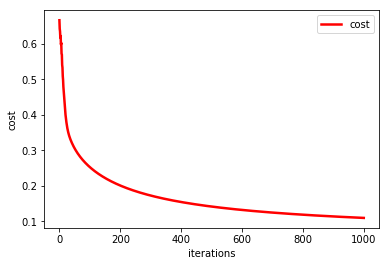

In [6]:
alpha = 0.001
iters = 100
steps = 10
theta = [0] * len(yversus)
gd    = [0] * len(yversus)

# multiple gradient descent classes and 
# thetas.  One for each type of target
for i in range(len(yversus)):
    
    # make theta a column vector of X feature length
    theta[i] = np.zeros(shape=(XOnes.shape[1], 1))
    gd[i]    = LogisticRegressor(XOnes, yversus[i], theta[i])

    plt.xlabel('iterations')
    plt.ylabel('cost')
    costy = []

    for s in range(0, steps):
        g, cost = gd[i].gradientDescent(alpha, iters)
        costy = costy + cost.tolist()
        
    print(g)
    plt.plot(list(range(0, steps*iters)), costy, linestyle="-", color='r', linewidth=2.5, label='cost')
    plt.legend(loc='upper right')
    plt.show()
    

In [165]:
# Now lets check out our prediction versus actual
# and the confidence.   We're effectively checking
# each of our LinearRegressors to see which one
# of them have the most confidence that the sample
# is in their classified group
#
for i in range(XOnes.shape[0]):
    py = 0.0
    for j in range(len(gd)):
        ptmp = gd[j].predict(XOnes[i])
        if (ptmp > py):
            py = ptmp
            pj = j
        
    if (y[i] != pj):
        print("actual=", y[i], "prediction=", pj, "confidence=", py, "<====Prediction error!")
    else:
        print("actual=", y[i], "prediction=", pj, "confidence=", py)


actual= [0] prediction= 0 confidence= [ 0.99645569]
actual= [0] prediction= 0 confidence= [ 0.98938597]
actual= [0] prediction= 0 confidence= [ 0.99407554]
actual= [0] prediction= 0 confidence= [ 0.98591718]
actual= [0] prediction= 0 confidence= [ 0.99691518]
actual= [0] prediction= 0 confidence= [ 0.9954767]
actual= [0] prediction= 0 confidence= [ 0.99336921]
actual= [0] prediction= 0 confidence= [ 0.99378128]
actual= [0] prediction= 0 confidence= [ 0.98281513]
actual= [0] prediction= 0 confidence= [ 0.98968908]
actual= [0] prediction= 0 confidence= [ 0.9972661]
actual= [0] prediction= 0 confidence= [ 0.99051349]
actual= [0] prediction= 0 confidence= [ 0.99022083]
actual= [0] prediction= 0 confidence= [ 0.99480196]
actual= [0] prediction= 0 confidence= [ 0.99952524]
actual= [0] prediction= 0 confidence= [ 0.99923474]
actual= [0] prediction= 0 confidence= [ 0.99868259]
actual= [0] prediction= 0 confidence= [ 0.99592132]
actual= [0] prediction= 0 confidence= [ 0.99597838]
actual= [0] pr